In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Health Screening Data.csv', index_col= None)

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'AgeinYr', 'BMI', 'BMICat', 'AgeGroup'],
      dtype='object')

In [4]:
data.shape

(69960, 18)

In [5]:
data = data.drop(columns=['Unnamed: 0', 'id',])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69960 non-null  int64  
 1   gender       69960 non-null  int64  
 2   height       69960 non-null  int64  
 3   weight       69960 non-null  float64
 4   ap_hi        69960 non-null  int64  
 5   ap_lo        69960 non-null  int64  
 6   cholesterol  69960 non-null  int64  
 7   gluc         69960 non-null  int64  
 8   smoke        69960 non-null  int64  
 9   alco         69960 non-null  int64  
 10  active       69960 non-null  int64  
 11  cardio       69960 non-null  int64  
 12  AgeinYr      69960 non-null  int64  
 13  BMI          69960 non-null  float64
 14  BMICat       69960 non-null  object 
 15  AgeGroup     69960 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


In [7]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60


**Exploramos Feature "age"**

In [8]:
data.age.value_counts()

18236    32
19741    32
20442    31
20376    31
18253    31
         ..
16167     1
17768     1
21497     1
23672     1
14329     1
Name: age, Length: 8076, dtype: int64

 Feature 'age'--> divide edad en días, no pareciera muy útil para el proyecto, se propone dropear

In [9]:
data = data.drop(columns=['age'])

**Exploramos Feature "AgeGroup"** --> divide edad en 3 categorias muy amplias y desbalanceadas

In [10]:
data.AgeGroup.value_counts()

40-60    56712
>60       9844
20-40     3404
Name: AgeGroup, dtype: int64

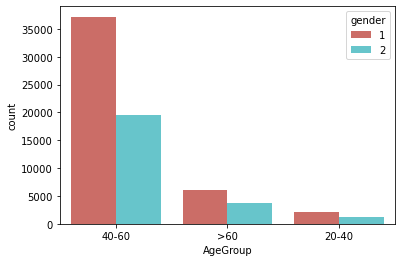

In [11]:
ax = sns.countplot(x="AgeGroup", data=data, hue= 'gender', palette="hls")


**Feature "AgeGroup"** --> divide edad en 3 categorias muy amplias y desbalanceadas. Se propone dropear y utilizar otras categorías a partir de Feature 'AgeinYR'

**Exploramos Feature "AgeinYr"** 

<AxesSubplot:xlabel='AgeinYr'>

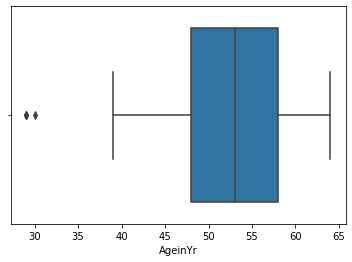

In [12]:
sns.boxplot(data= data,x='AgeinYr')


In [13]:
data.AgeinYr.value_counts().sort_index()

29       3
30       1
39    1779
40    1621
41    1902
42    1418
43    2029
44    1512
45    2086
46    1622
47    2196
48    1810
49    3415
50    3213
51    3366
52    3279
53    3866
54    3603
55    3926
56    3605
57    3682
58    3408
59    3575
60    3199
61    2727
62    2197
63    2734
64    2186
Name: AgeinYr, dtype: int64

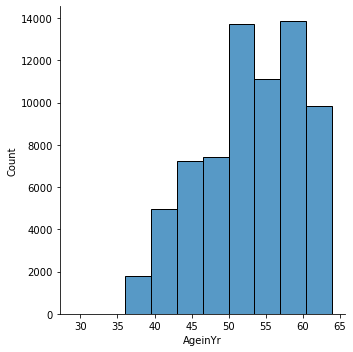

In [14]:
sns.displot(data.AgeinYr, bins = 10, palette='Set2')


In [15]:
data.AgeinYr.describe()

count    69960.000000
mean        52.841109
std          6.766655
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: AgeinYr, dtype: float64

**Feature "AgeinYR"** --> se propone conservar feature pero también discretizar en categorias

In [16]:
#Discretizacion de variables Age

bins = [0, 30, 40, 50, 60, 70]
AgeCat = pd.cut(data.AgeinYr, bins, right = False)

data['AgeCat'] = AgeCat



In [17]:
data['AgeCat'].value_counts()

[50, 60)    35523
[40, 50)    19611
[60, 70)    13043
[30, 40)     1780
[0, 30)         3
Name: AgeCat, dtype: int64

**Exploramos Feature "height"** 

In [18]:
data.height.value_counts()

165    5852
160    5019
170    4676
168    4395
164    3393
       ... 
81        1
80        1
207       1
76        1
64        1
Name: height, Length: 109, dtype: int64

<AxesSubplot:xlabel='height'>

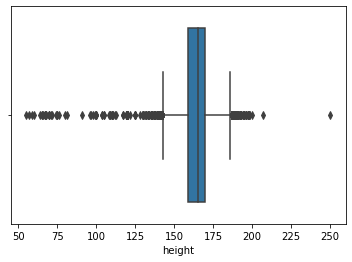

In [19]:
sns.boxplot(data= data,x='height')


In [20]:
data.height.describe()

count    69960.000000
mean       164.359105
std          8.210541
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [21]:
import numpy as np
 
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(data.height)
data[(data.height < lowerbound) | (data.height > upperbound)]

data.drop(data[ (data.height > upperbound) | (data.height < lowerbound) ].index , inplace=True)

data.shape

(69441, 16)

<AxesSubplot:xlabel='height'>

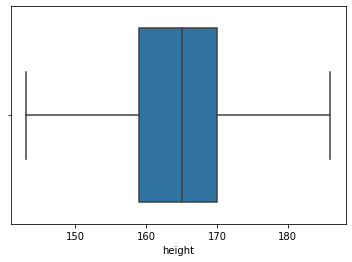

In [22]:
sns.boxplot(data= data,x='height')


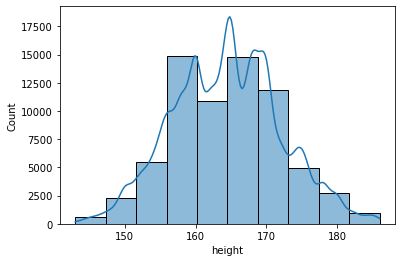

In [23]:

sns.histplot(data.height,kde=True, bins=10)
plt.show()

In [24]:
data.height.describe()

count    69441.000000
mean       164.400369
std          7.621312
min        143.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        186.000000
Name: height, dtype: float64

Text(0.5, 1.0, 'height by gender')

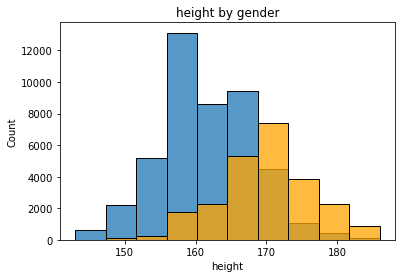

In [25]:
data_male = data[data.gender == 1]
data_male_height= data_male.height


sns.histplot(data_male_height,  kde=False, bins = 10, label='male')

data_fem = data[data.gender == 2]
data_fem_height = data_fem.height
sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'orange')

plt.xlabel("height")

# Add title
plt.title("height by gender")



El **histograma** me sirve para identificar que **1 = female y 2 = male en feature 'gender'**

In [26]:
data.gender.value_counts()
(data.gender.value_counts() / data.shape[0]) * 100  #por height deduzco que '1' = female, '2' = male

1    65.177633
2    34.822367
Name: gender, dtype: float64

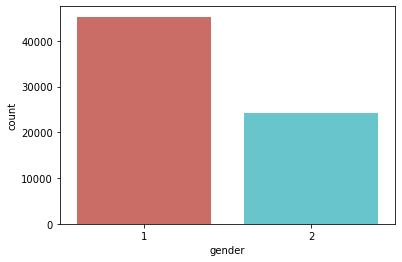

In [27]:
ax = sns.countplot(x="gender", data=data, palette="hls")


**Feature "weight"** 

In [28]:
data.weight.value_counts()

65.0     3841
70.0     3741
68.0     2815
75.0     2725
60.0     2692
         ... 
121.3       1
62.7        1
58.7        1
81.1        1
74.3        1
Name: weight, Length: 282, dtype: int64

In [29]:
data.weight.describe()

count    69441.000000
mean        74.155120
std         14.288422
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

<AxesSubplot:xlabel='weight'>

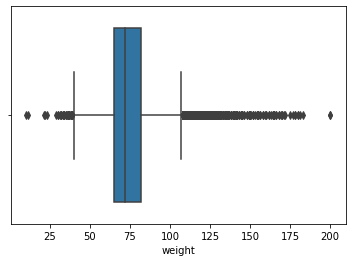

In [30]:
sns.boxplot(data= data,x='weight')


In [31]:
lowerbound,upperbound = outlier_treatment(data.weight)
data[(data.weight < lowerbound) | (data.height > upperbound)]

data.drop(data[ (data.weight > upperbound) | (data.weight < lowerbound) ].index , inplace=True)

data.shape

(67683, 16)

<AxesSubplot:xlabel='weight'>

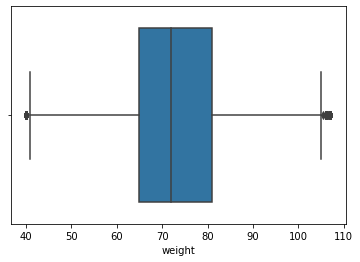

In [32]:
sns.boxplot(data= data,x='weight')


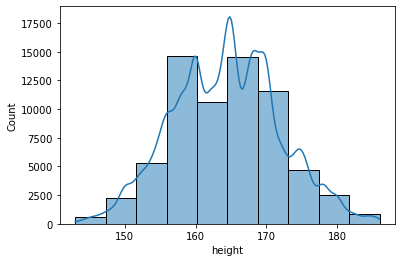

In [33]:

sns.histplot(data.height,kde=True, bins=10)
plt.show()

In [34]:
data.weight.describe()

count    67683.000000
mean        73.061586
std         12.407145
min         40.000000
25%         65.000000
50%         72.000000
75%         81.000000
max        107.000000
Name: weight, dtype: float64

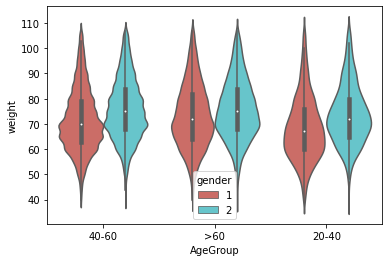

In [35]:
sns.violinplot(x=data.AgeGroup, y=data.weight, hue="gender", data=data, palette="hls")
plt.show()

**Feature "BMI"** 

In [36]:
data.BMI.value_counts()

23.9    1433
24.2    1347
23.4    1039
31.2    1034
24.8     902
        ... 
46.3       1
47.7       1
43.8       1
47.4       1
45.4       1
Name: BMI, Length: 322, dtype: int64

<AxesSubplot:xlabel='BMI'>

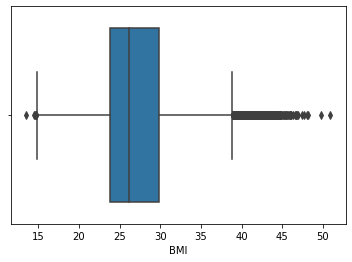

In [37]:
sns.boxplot(data= data,x='BMI')


**Feature "BMICat"** 

In [38]:
data.BMICat.value_counts()

Over Weight     25410
Normal          25044
Obese           16665
Under Weight      564
Name: BMICat, dtype: int64

In [39]:
(data.BMICat.value_counts() / data.shape[0]) * 100

Over Weight     37.542662
Normal          37.001906
Obese           24.622136
Under Weight     0.833296
Name: BMICat, dtype: float64

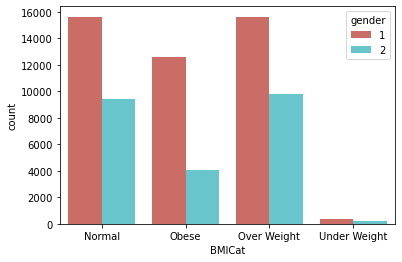

In [40]:
ax = sns.countplot(x="BMICat", data=data, hue= 'gender', palette="hls")


**gráficos cruzando variables**

Text(0.5, 1.0, 'years by gender')

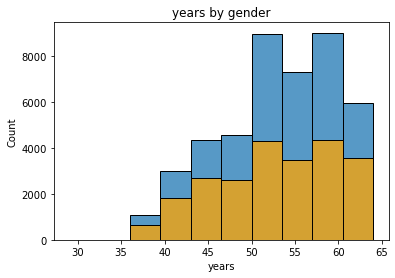

In [41]:
data_male = data[data.gender == 1]
data_male_years = data_male.AgeinYr


sns.histplot(data_male_years,  kde=False, bins = 10, label='male')

data_fem = data[data.gender == 2]
data_fem_years = data_fem.AgeinYr
sns.histplot(data_fem_years,  kde=False, label='female', bins = 10, color = 'orange')

plt.xlabel("years")

# Add title
plt.title("years by gender")

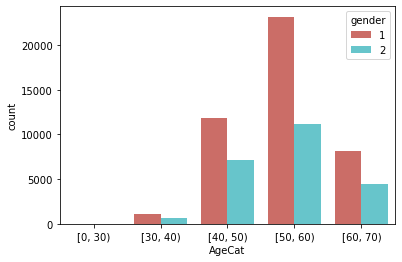

In [42]:
ax = sns.countplot(x="AgeCat", data=data, hue= 'gender', palette="hls")


<AxesSubplot:>

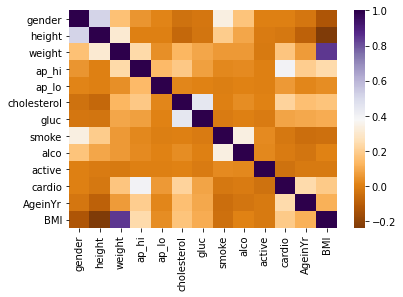

In [43]:
# Calculate correlation between each pair of variable
corr_matrix=data.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')